<a href="https://colab.research.google.com/github/HMoreyP/analise_PokeAPI/blob/main/An%C3%A1lise_PokeAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests

In [ ]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

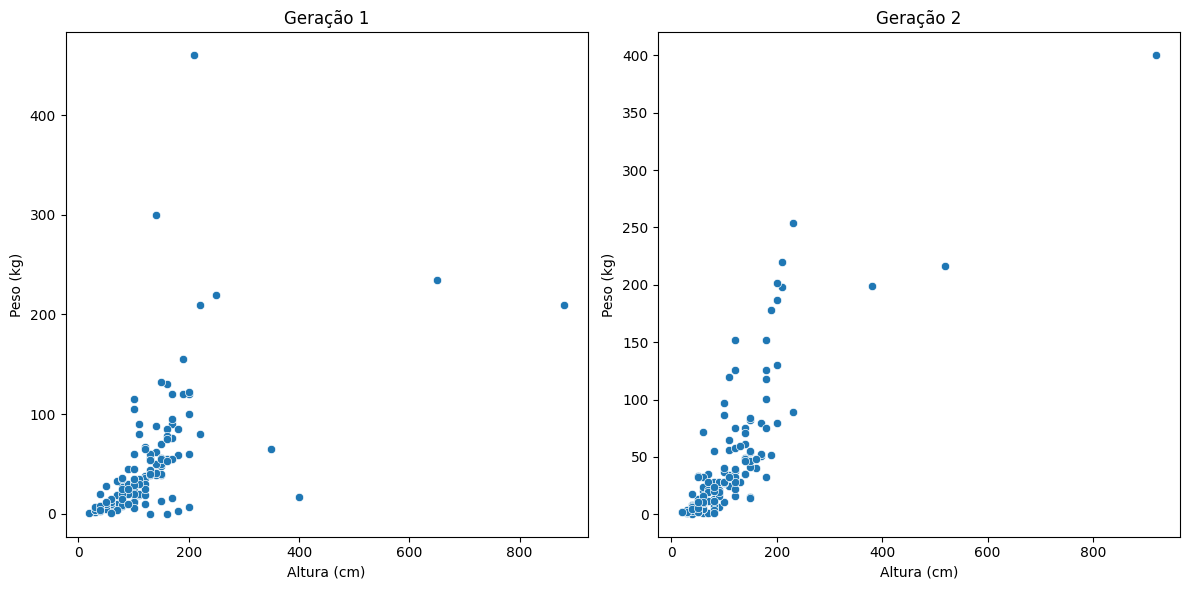

In [ ]:
# Função para obter os dados de um endpoint da PokéAPI
def get_pokemon_data(url):
    response = requests.get(url)
    data = response.json()
    return data

# URL base da PokéAPI
base_url = "https://pokeapi.co/api/v2/pokemon/"

# Lista para armazenar os dados de cada Pokémon
pokemon_data = []

# Loop para obter os dados das duas primeiras gerações
# 1º loop: geração 1 e 2
# 2º loop: vai de 1 a 152 para (gen1) e 152 até 303 (gen2)
for generation in range(1, 3):
    for i in range((generation-1)*151+1, generation*151+1):
        url = f"{base_url}{i}"
        data = get_pokemon_data(url)
        pokemon_data.append({
            'nome': data['name'],
            'altura': data['height'],
            'peso': data['weight'],
            'tipo': ', '.join([t['type']['name'] for t in data['types']]),
            'hp': data['stats'][0]['base_stat'],
            'geracao': generation,
            'ataque': data['stats'][1]['base_stat'],
            'defesa': data['stats'][2]['base_stat'],
            'ataque_especial': data['stats'][3]['base_stat'],
            'defesa_especial': data['stats'][4]['base_stat'],
            'velocidade': data['stats'][5]['base_stat']
        })

# Criando um DataFrame
df = pd.DataFrame(pokemon_data)

df['altura'] = df['altura'] * 10
df['peso'] = df['peso'] * 0.1

# Filtrando os dados para as gerações 1 e 2
df_geracao1 = df[df['geracao'] == 1]
df_geracao2 = df[df['geracao'] == 2]

# Criando subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de dispersão para a geração 1
sns.scatterplot(x='altura', y='peso', data=df_geracao1, ax=axes[0])
axes[0].set_title('Geração 1')
axes[0].set_xlabel('Altura (cm)')
axes[0].set_ylabel('Peso (kg)')

# Gráfico de dispersão para a geração 2
sns.scatterplot(x='altura', y='peso', data=df_geracao2, ax=axes[1])
axes[1].set_title('Geração 2')
axes[1].set_xlabel('Altura (cm)')
axes[1].set_ylabel('Peso (kg)')

plt.tight_layout()
plt.show()

Pelo que podemos ver, há uma tendência geral de que Pokémons mais altos pesem mais nas duas gerações. Isso indica que existe uma correlação entre as duas variáveis.

Além disso, por existirem alguns dados dispersos, pode ser que exista alguma outra característica que influencie no peso e na altura, como sua espécie ou alguma característica individual.

Por não termos uma linha reta perfeita, a relação entre as duas variáveis não é simples e linear, mas sim mais complexa.

Portanto, apesar do gráfico sugerir que a altura influencia no peso, não é o único fator determinante.

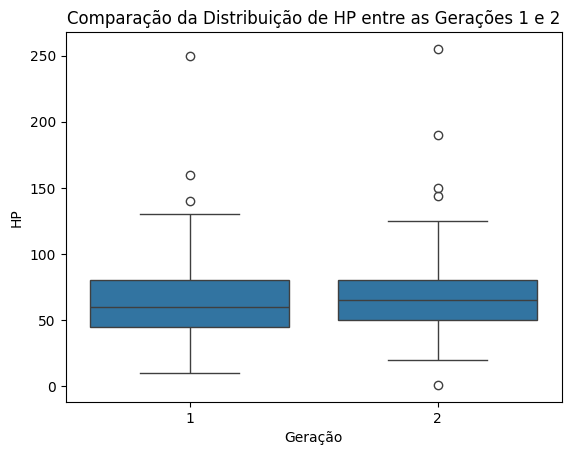

In [ ]:
# Boxplot comparando a distribuição de HP
sns.boxplot(x='geracao', y='hp', data=df[df['geracao'].isin([1, 2])])
plt.title('Comparação da Distribuição de HP entre as Gerações 1 e 2')
plt.xlabel('Geração')
plt.ylabel('HP')
plt.show()

O gráfico boxlot compara a distribuição dos pontos de vida (HP) dos Pokémons entre as gerações 1 e 2.

Podemos notar que a mediana dos valores de HP para ambas gerações parece ser bem similares, ou seja, os Pokémons das duas gerações possuem valores de vida próximos.

Além disso, a caixa das duas gerações é semelhante, sugerindo que os valores de HP possuem uma variação similiar.

Em resumo, o boxplot indica que os valores de HP dos Pokémons das gerações 1 e 2 são bastante similares. Embora existam diferenças sutis, a tendência geral e a dispersão de dados são semelhantes entre as duas gerações.


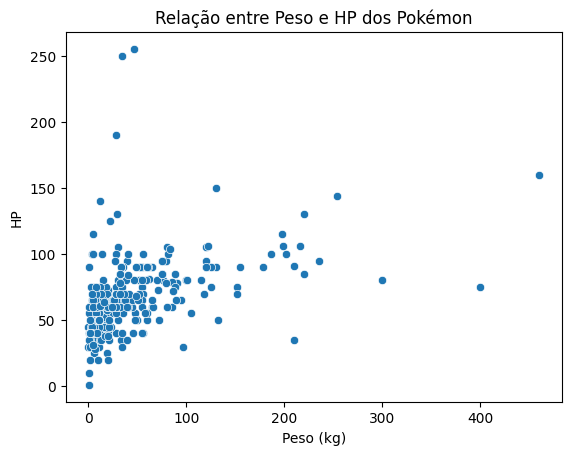

In [ ]:
# Criando o gráfico de dispersão para todas as gerações
sns.scatterplot(x='peso', y='hp', data=df)
plt.title('Relação entre Peso e HP dos Pokémon')
plt.xlabel('Peso (kg)')
plt.ylabel('HP')
plt.show()

Analisando o gráfico de dispersão podemos notar que, apesar de existir uma tendência de Pokémons mais pesados terem mais HP, essa relação não é forte e outros fatores também influenciam na quantidade de HP de um Pokémon.

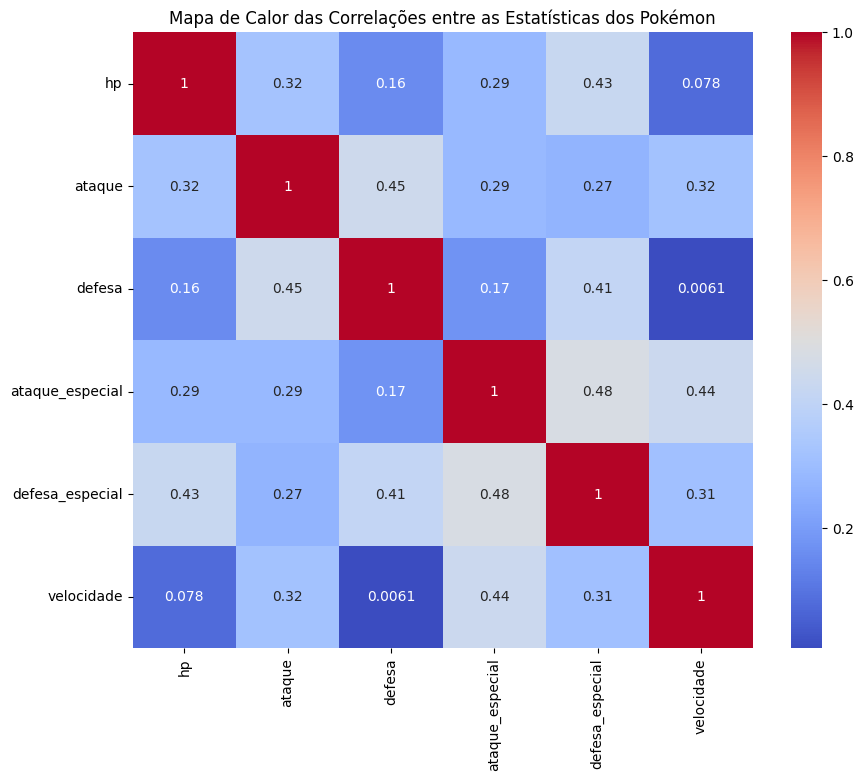

In [ ]:
# Selecionando as colunas de interesse
stats_cols = ['hp', 'ataque', 'defesa', 'ataque_especial', 'defesa_especial', 'velocidade']

# Calculando a matriz de correlação
corr_matrix = df[stats_cols].corr()

# Criando o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor das Correlações entre as Estatísticas dos Pokémon')
plt.show()

Analisando o mapa de calor, podemos ver que existe uma correlação entre
**ataque** e **defesa** e **ataque especial** e **defesa especial**, indicando que Pokémons que possuem ataques altos também tender a ter uma defesa maior. O mesmo vale para ataque especial e defesa especial.

Podemos ver também uma correlação entre **HP** e **defesa especial**, o que indica que um Pokémon com mais pontoso de vida tende a ter uma defesa especial mais elevada.

Além disso, conseguimos notar que a **velocidade** não está muito relacionada com outra características do Pokémon.

Portanto, o mapa de calor sugere que muitos Pokémons tendem a ter um perfil mais equilibrado, com valores moderados em várias estatísticas, o que deixa o mundo Pokémon mais equilibrado também.